<a href="https://colab.research.google.com/github/richardtekere09/Machine_Learning_labs/blob/main/lab3_MLP_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Task 1: Multilayer Neural Network for XOR
class MultilayerNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.hidden_weights = np.random.randn(input_size, hidden_size)
        self.hidden_bias = np.random.randn(hidden_size)
        self.output_weights = np.random.randn(hidden_size, output_size)
        self.output_bias = np.random.randn(output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, inputs):
        self.hidden_layer_input = np.dot(inputs, self.hidden_weights) + self.hidden_bias
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.output_weights) + self.output_bias
        self.output_layer_output = self.sigmoid(self.output_layer_input)
        return self.output_layer_output

    def backward(self, inputs, outputs, learning_rate):
        output_error = outputs - self.output_layer_output
        output_delta = output_error * self.sigmoid_derivative(self.output_layer_output)

        hidden_error = np.dot(output_delta, self.output_weights.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_layer_output)

        # Update weights and biases
        self.output_weights += np.dot(self.hidden_layer_output.T, output_delta) * learning_rate
        self.output_bias += np.sum(output_delta, axis=0) * learning_rate
        self.hidden_weights += np.dot(inputs.T, hidden_delta) * learning_rate
        self.hidden_bias += np.sum(hidden_delta, axis=0) * learning_rate

    def train(self, inputs, outputs, learning_rate=0.1, epochs=10000):
        for epoch in range(epochs):
            self.forward(inputs)
            self.backward(inputs, outputs, learning_rate)
            if epoch % 1000 == 0:
                loss = np.mean((outputs - self.output_layer_output) ** 2)
                print(f"Epoch {epoch}, Loss: {loss}")

# Define XOR dataset
xor_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_outputs = np.array([[0], [1], [1], [0]])  # XOR truth table

# Train a multilayer neural network for XOR
print("\nTraining Multilayer Neural Network for XOR operation")
xor_nn = MultilayerNN(input_size=2, hidden_size=2, output_size=1)
xor_nn.train(xor_inputs, xor_outputs)




Training Multilayer Neural Network for XOR operation
Epoch 0, Loss: 0.2523590169650226
Epoch 1000, Loss: 0.24912588403744385
Epoch 2000, Loss: 0.24432837789789769
Epoch 3000, Loss: 0.21257018461942884
Epoch 4000, Loss: 0.17787245905894977
Epoch 5000, Loss: 0.15587905402178748
Epoch 6000, Loss: 0.14206528281255576
Epoch 7000, Loss: 0.12307177985189097
Epoch 8000, Loss: 0.024931194567191343
Epoch 9000, Loss: 0.01074432472307528


**Task 2**
*   Input Layer: 784 neurons (28x28 input size).
*   Hidden Layer: 25 neurons.
*   Output Layer: 10 separate networks, each with 1 neuron for recognizing one digit (0–9).
*   Activation Function: Sigmoid.
*   Loss Function: Mean Squared Error (MSE).


Training neural network for digit recognition


<ipython-input-81-b4c5f066b53d>:21: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 0, MSE: 0.0807
Epoch 10, MSE: 0.0766
Epoch 20, MSE: 0.0759
Epoch 30, MSE: 0.0759
Epoch 40, MSE: 0.0753

Accuracy: 37.17%


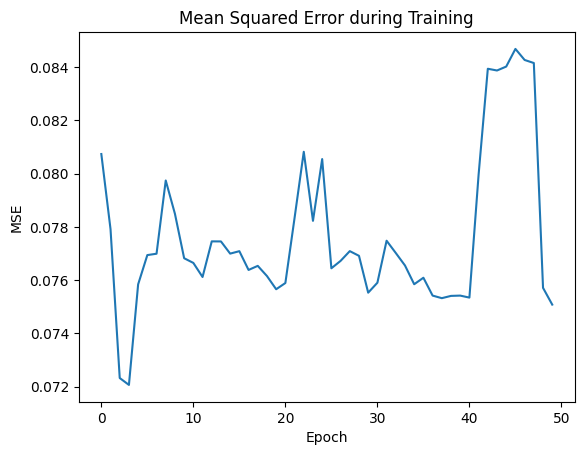

In [ ]:
# Task 2: Multilayer Neural Network for Digit Recognition (MNIST)
class MNISTNeuralNetwork:
    def __init__(self, num_classes=10, input_size=784):
        self.neurons = [MultilayerNN(input_size, 25, 1) for _ in range(num_classes)]

    def train(self, X, y, learning_rate=0.01, epochs=100):
        mse_history = []

        for epoch in range(epochs):
            epoch_mse = 0

            for i, image in enumerate(X):
                targets = np.zeros(10)
                targets[y[i]] = 1
                outputs = []

                for digit, neuron in enumerate(self.neurons):
                    output = neuron.forward(image.reshape(1, -1))
                    neuron.backward(image.reshape(1, -1), np.array([[targets[digit]]]), learning_rate)
                    outputs.append(output)
                epoch_mse += np.mean((targets - np.array(outputs).flatten()) ** 2)

            mse_history.append(epoch_mse / len(X))
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, MSE: {mse_history[-1]:.4f}")

        return mse_history

    def predict(self, X):
        predictions = []
        for image in X:
            outputs = [neuron.forward(image.reshape(1, -1)) for neuron in self.neurons]
            predictions.append(np.argmax(outputs))
        return predictions

# Load the MNIST dataset
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28 * 28).astype("float32") / 255
X_test = X_test.reshape(-1, 28 * 28).astype("float32") / 255

# Train the MNIST neural network
print("\nTraining neural network for digit recognition")
nn = MNISTNeuralNetwork()
mse_history = nn.train(X_train, y_train, learning_rate=1.5, epochs=50)

# Evaluate the model
predictions = nn.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

# Plot MSE during training
plt.plot(mse_history)
plt.title("Mean Squared Error during Training")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()


Task 2_2 :

*   single output layer with 10 neurons
*   ReLU activation
* Processes data in batches,
* Includes accuracy calculation and plots MSE during training.


Training neural network for digit recognition...
Epoch 1/10, MSE: 0.0266
Epoch 2/10, MSE: 0.0136
Epoch 3/10, MSE: 0.0116
Epoch 4/10, MSE: 0.0103
Epoch 5/10, MSE: 0.0095
Epoch 6/10, MSE: 0.0089
Epoch 7/10, MSE: 0.0084
Epoch 8/10, MSE: 0.0081
Epoch 9/10, MSE: 0.0078
Epoch 10/10, MSE: 0.0075

Accuracy: 95.40%


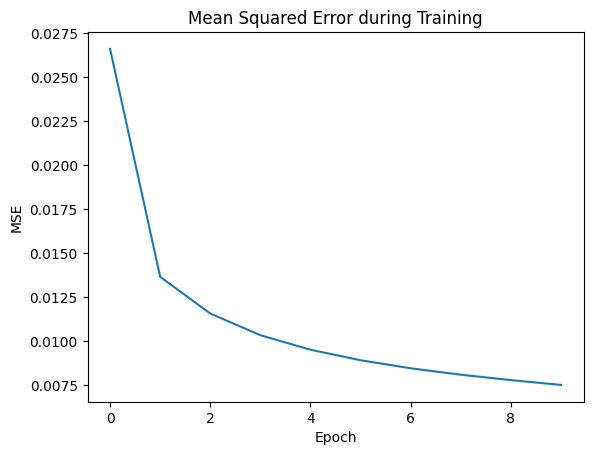

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

class MultilayerNN:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.hidden_weights = np.random.randn(input_size, hidden_size) * 0.1
        self.hidden_bias = np.zeros(hidden_size)
        self.output_weights = np.random.randn(hidden_size, output_size) * 0.1
        self.output_bias = np.zeros(output_size)

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, inputs):
        # Forward pass
        self.hidden_layer_input = np.dot(inputs, self.hidden_weights) + self.hidden_bias
        self.hidden_layer_output = self.relu(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.output_weights) + self.output_bias
        self.output_layer_output = self.sigmoid(self.output_layer_input)
        return self.output_layer_output

    def backward(self, inputs, targets, learning_rate):
        # Backpropagation
        output_error = targets - self.output_layer_output
        output_delta = output_error * self.sigmoid_derivative(self.output_layer_output)

        hidden_error = np.dot(output_delta, self.output_weights.T)
        hidden_delta = hidden_error * self.relu_derivative(self.hidden_layer_output)

        # Update weights and biases
        self.output_weights += np.dot(self.hidden_layer_output.T, output_delta) * learning_rate
        self.output_bias += np.sum(output_delta, axis=0) * learning_rate
        self.hidden_weights += np.dot(inputs.T, hidden_delta) * learning_rate
        self.hidden_bias += np.sum(hidden_delta, axis=0) * learning_rate

    def train(self, X, y, learning_rate=0.01, epochs=50, batch_size=32):
        mse_history = []
        for epoch in range(epochs):
            epoch_mse = 0
            for i in range(0, len(X), batch_size):
                batch_X = X[i:i + batch_size]
                batch_y = y[i:i + batch_size]

                outputs = self.forward(batch_X)
                self.backward(batch_X, batch_y, learning_rate)
                epoch_mse += np.mean((batch_y - outputs) ** 2)

            mse_history.append(epoch_mse / (len(X) // batch_size))
            print(f"Epoch {epoch + 1}/{epochs}, MSE: {mse_history[-1]:.4f}")
        return mse_history

    def predict(self, X):
        outputs = self.forward(X)
        return np.argmax(outputs, axis=1)

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28 * 28).astype("float32") / 255
X_test = X_test.reshape(-1, 28 * 28).astype("float32") / 255
y_train = to_categorical(y_train, 10)
y_test_labels = y_test  # Save true labels for accuracy calculation
y_test = to_categorical(y_test, 10)

# Initialize and train the neural network
nn = MultilayerNN(input_size=784, hidden_size=25, output_size=10)
print("\nTraining neural network for digit recognition...")
mse_history = nn.train(X_train, y_train, learning_rate=0.01, epochs=10, batch_size=64)

# Evaluate the model
predictions = nn.predict(X_test)
accuracy = np.mean(predictions == y_test_labels)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

# Plot MSE during training
plt.plot(mse_history)
plt.title("Mean Squared Error during Training")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()


Task 3

In [ ]:
# Task 3: Implement using Keras
print("\nTraining neural network using Keras")
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess data
X_train = X_train.reshape(-1, 28 * 28).astype("float32") / 255
X_test = X_test.reshape(-1, 28 * 28).astype("float32") / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Build the model
model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(784,)),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Keras Model Accuracy: {accuracy * 100:.2f}%")




Training neural network using Keras
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8645 - loss: 0.4867 - val_accuracy: 0.9545 - val_loss: 0.1624
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9581 - loss: 0.1459 - val_accuracy: 0.9645 - val_loss: 0.1265
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9712 - loss: 0.0952 - val_accuracy: 0.9675 - val_loss: 0.1088
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9791 - loss: 0.0706 - val_accuracy: 0.9711 - val_loss: 0.0948
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9858 - loss: 0.0485 - val_accuracy: 0.9718 - val_loss: 0.0945
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9691 - loss: 0.0966
Keras Model Accuracy: 97.34%


Task 4

In [ ]:
# Task 4: Custom Data Test
from PIL import Image

# Load a custom image (28x28 grayscale)
def load_custom_image(filepath):
    img = Image.open(filepath).convert("L")  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28
    img = np.array(img).astype("float32") / 255  # Normalize pixel values
    return img.reshape(1, -1)

# Test the custom image with both models
custom_image_path = "MNIST.png"  # Replace with your image path
custom_image = load_custom_image(custom_image_path)

custom_prediction_nn = nn.predict(custom_image)
print(f"Custom Neural Network Prediction: {custom_prediction_nn}")

# Predict using Keras model
custom_prediction_keras = model.predict(custom_image)
print(f"Keras Model Prediction: {np.argmax(custom_prediction_keras)}")


Custom Neural Network Prediction: [8]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Keras Model Prediction: 3
